In [1]:
import numpy as np#넘파이 라이브러리를 사용하게 함
import matplotlib.pyplot as plt#matplot 라이브러리를 사용하게 함
from keras.models import Sequential#케라스의 Sequential 함수를 사용하게 함
from keras.layers import Dense, Flatten#Dense, Flatten 모델 함수를 사용하게 함
from keras.layers.convolutional import Conv2D, MaxPooling2D#conv모델과 maxpooling을 사용하게 함
from keras.preprocessing.image import ImageDataGenerator#이미지를 정규화시키는 모듈을 사용하게 함
from PIL import Image#이미지를 변환하는 함수를 사용할 수 있게 함
import os#파일 정보에 관한 함수를 사용하게 함
import glob#특정 파일 목록을 가져오는 함수를 사용하게 함
import os.path#파일경로에 관한 함수를 사용하게 함

Using TensorFlow backend.


In [2]:
train_dir = 'train'#훈련할 이미지가 저장된 디렉토리 지정
test_dir = 'test'#테스트할 이미지가 저장된 디렉토리 지정

imsidir = os.path.join('train')#이미지들이 있는 디렉토리 지정
folder_list = os.listdir(imsidir)#훈련디렉토리 안의 폴더 리스트를 가져옴
categories = folder_list#이미지 디렉토리 안의 파일 이름들을 카테고리로 지정
folder_list#폴더 리스트를 보여준다

nb_classes = len(categories)

X = []
y = []#빈 배열 생성

for idx, cat in enumerate(categories):#카테고리 열거
    
    #one-hot 돌리기.(카테고리들을 벡터화 시키기 위하여)
    label = [0 for i in range(nb_classes)]#파일안에 있는 카테고리들을 숫자로 만듬
    label[idx] = 1

    image_dir = train_dir + "/" + cat
    files = glob.glob(image_dir+"/*.*")
    print(cat, " 파일 갯수 : ", len(files))
    for i, f in enumerate(files):#파일 열거
        img = Image.open(f)
        img = img.convert("RGB")
        
        data = np.asarray(img)#이미지를 배열로

        X.append(data)
        y.append(label)  

X = np.array(X)#이미지(배열)가 추가된 배열 생성
y = np.array(y)#레이블 배열 생성

IRENE  파일 갯수 :  420
IU  파일 갯수 :  420
JENNY  파일 갯수 :  420
KIMGOEUN  파일 갯수 :  420
LISA  파일 갯수 :  420
NAYEON  파일 갯수 :  420
ROSE  파일 갯수 :  420
TAEYEON  파일 갯수 :  420
YEJI  파일 갯수 :  420
YOONA  파일 갯수 :  420


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, fill_mode='nearest')#훈련이미지 크기 재조정 및 회전 범위 지정
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=720,
                                                   class_mode='categorical')#모든 훈련이미지 크기 재조정하고 훈련이미지를 배치 단위로 불러옴

test_datagen = ImageDataGenerator(rescale=1./255)#테스트이미지 크기 재조정
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(128,128),
                                                 batch_size=1,
                                                 class_mode='categorical')#테스트이미지 크기 재조정하고 테스트이미지를 배치 단위로 불러옴

for data_batch, labels_batch in train_generator:#트레인 제너레이터에 대하여 배치 데이터 크기와 레이블 크기를 찾을 때까지 반복
    print('배치 데이터 크기:', data_batch.shape)#배치 데이터 크기를 보여줌
    print('배치 레이블 크기:', labels_batch.shape)#배치 레이블 크기를 보여줌
    break#포문 종료

Found 4200 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
배치 데이터 크기: (720, 128, 128, 3)
배치 레이블 크기: (720, 10)


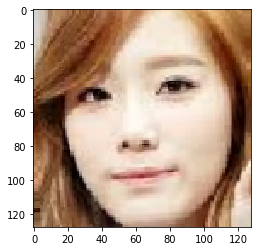

In [4]:
index=50
image = data_batch[index]

plt.imshow(image)#이미지를 저장한다.
plt.show()#이미지를 띄운다

In [5]:
labels_batch[index]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [6]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'IRENE',
 1: 'IU',
 2: 'JENNY',
 3: 'KIMGOEUN',
 4: 'LISA',
 5: 'NAYEON',
 6: 'ROSE',
 7: 'TAEYEON',
 8: 'YEJI',
 9: 'YOONA'}

In [7]:
# 30번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[index])]

'TAEYEON'

In [8]:
model = Sequential()#CNN모델 정의
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))#첫 컨볼루션 레이어 생성(64행,64열,3채널)
model.add(MaxPooling2D(pool_size=(2,2)))#맥스풀링(출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만드는 것) 사용
model.add(Conv2D(64, (3,3), activation='relu'))#다른 컨볼루션 레이어 생성
model.add(MaxPooling2D(pool_size=(2,2)))#맥스풀링 사용
model.add(Conv2D(64, (3,3), activation='relu'))#컨볼루션 레이어 1개를 쌓았음

model.add(Flatten())#데이터를 1차원으로 만들어 줌
model.add(Dense(128, activation='relu'))#레이어 생성(relu: 내무 히든 레이어를 활성화하고  0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환하는 함수)
model.add(Dense(64, activation='relu'))#레이어 생성
model.add(Dense(32, activation='relu'))#레이어 생성
model.add(Dense(10, activation='softmax')) #폴더갯수 출력 및 출력층 

model.summary()#모델을 출력

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])#모델 활성화 레이어 배치, 위에서 정의했던 값들이 훈련 과정에서 결과 화면에 출력됨

history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=44,
                              validation_data=test_generator,
                              validation_steps=100)#CNN 모델을 어떤 방식으로 작동시킬지 결정한다
#val_acc 높이는게 우선

Epoch 1/44
10/10 [==============================] - 23s 2s/step - loss: 2.3841 - acc: 0.1092 - val_loss: 2.1386 - val_acc: 0.1700
Epoch 2/44
10/10 [==============================] - 23s 2s/step - loss: 2.2508 - acc: 0.1883 - val_loss: 1.5328 - val_acc: 0.2400
Epoch 3/44
10/10 [==============================] - 23s 2s/step - loss: 2.0686 - acc: 0.2797 - val_loss: 2.5085 - val_acc: 0.3700
Epoch 4/44
10/10 [==============================] - 23s 2s/step - loss: 1.7833 - acc: 0.4031 - val_loss: 3.7806 - val_acc: 0.4100
Epoch 5/44
10/10 [==============================] - 23s 2s/step - loss: 1.5917 - acc: 0.4552 - val_loss: 1.3586 - val_acc: 0.4400
Epoch 6/44
10/10 [==============================] - 23s 2s/step - loss: 1.3966 - acc: 0.5307 - val_loss: 1.9613 - val_acc: 0.5700
Epoch 7/44
10/10 [==============================] - 23s 2s/step - loss: 1.2902 - acc: 0.5739 - val_loss: 5.0441 - val_acc: 0.5400
Epoch 8/44
10/10 [==============================] - 23s 2s/step - loss: 1.2379 - acc: 0.59

In [10]:
_loss, _acc = model.evaluate_generator(test_generator, steps=800)
print('loss: {:.3f}, accuracy: {:.3f}'.format(_loss, _acc))
#총체적으로 훈련된 결과들을 보여줌

loss: 0.000, accuracy: 0.835


In [11]:
class_idx = list(np.arange(9)) #인덱스을 0~8으로 지정
class_label = {}#배열 생성

for i in range(9):#폴더 개수
    class_label[class_idx[i]] = categories[i]#이미지들을 배열에 저장

y_predict = model.predict_generator(test_generator, steps=800) #y_predict가 사진을 모델에 돌렸을 때 모델이 추측한 값
predicted_class = np.argmax(y_predict, axis=1)#예측한 값들을 배열 형태로 구성
print(predicted_class)#예측값 구성 결과를 화면에 출력

[8 9 5 7 5 9 8 2 4 3 2 3 8 8 3 3 3 4 0 0 7 1 8 6 5 7 2 8 8 1 8 9 4 2 8 8 2
 8 3 2 2 4 0 8 4 1 7 4 3 6 3 6 9 0 8 0 1 7 8 7 6 5 1 1 7 2 3 1 4 9 3 9 5 1
 6 9 6 1 5 9 5 6 4 3 6 3 7 5 8 4 2 4 6 2 1 5 1 7 0 8 4 5 6 5 7 7 0 8 1 2 1
 0 6 7 0 5 9 9 7 7 4 6 1 4 4 6 5 0 8 7 3 7 8 2 7 0 4 7 3 4 8 8 9 1 9 3 5 0
 8 0 3 1 9 8 2 7 7 4 8 8 8 7 1 9 0 5 3 6 3 6 8 5 8 7 2 2 1 8 6 5 6 5 2 9 7
 7 0 7 1 8 1 6 6 9 9 0 6 8 3 5 9 1 3 7 1 3 4 8 0 2 7 1 7 8 6 1 3 7 9 7 5 4
 9 6 2 3 2 7 9 1 3 2 2 1 7 4 9 2 3 7 2 7 0 8 0 4 7 4 1 4 7 4 9 8 8 0 9 1 9
 3 3 9 9 8 1 0 9 3 0 4 4 2 1 9 6 7 7 0 3 9 4 0 2 9 9 0 7 1 1 0 6 8 2 7 8 7
 6 1 9 7 2 1 1 4 2 1 9 4 3 0 1 5 8 6 7 1 0 1 3 7 6 9 9 1 2 5 3 7 0 0 1 7 9
 3 4 7 9 6 1 9 1 7 4 1 9 8 6 6 3 6 6 8 6 1 7 7 3 4 7 8 1 0 9 4 4 6 7 9 9 2
 8 7 7 2 8 4 3 8 4 1 6 6 5 9 9 4 3 9 7 7 8 5 9 6 2 0 5 3 2 6 8 4 6 4 0 1 9
 7 1 1 4 3 9 8 5 1 1 1 5 3 8 2 5 4 8 0 8 7 4 8 3 5 1 7 0 7 7 8 7 9 5 8 6 0
 3 6 9 7 1 2 3 8 1 0 3 1 4 0 1 2 9 9 7 7 9 8 0 8 4 9 0 8 5 8 1 3 9 2 1 1 6
 4 4 3 8 3 7 8 4 0 4 2 3 

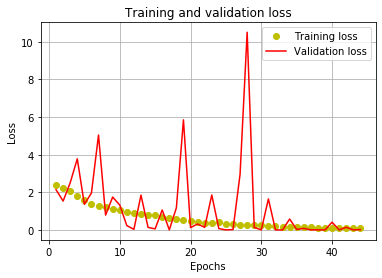

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)#에폭 횟수를 이용해 객체 생성

plt.plot(epochs, loss, 'yo', label='Training loss')#yo=노란색 점,훈련 데이터에 대한 손실
plt.plot(epochs, val_loss, 'r', label='Validation loss')#r=빨간색 실선, 검증 데이터에 대한 손실
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')#최적의 위치에 범례를 위치시킴
plt.grid()
plt.show()


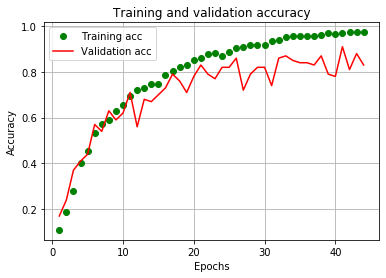

In [13]:
plt.clf() 

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')#go=초록색 점,훈련 데이터에 대한 정확도
plt.plot(epochs, val_acc, 'r', label='Validation acc')#빨간색 실선,검증 데이터에 대한 정확도
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()##범례를 보여줌
plt.grid()
plt.show()

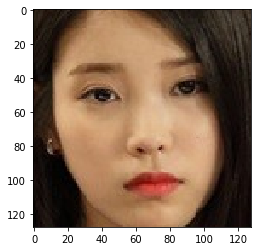

In [14]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break

index = 0

# 테스트셋의  0번째 이미지 출력
image = data_batch[index]

plt.imshow(image)
plt.show()

In [15]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 0번쨰 번째 라벨 이름 출력
labels_list[np.argmax(results[index])]

'IU'

In [16]:
results[0][np.argmax(results[index])]

0.99833894

In [18]:
test_generator = test_datagen.flow_from_directory('who',
                                                 target_size=(128,128),
                                                 batch_size=1)

Found 8 images belonging to 1 classes.


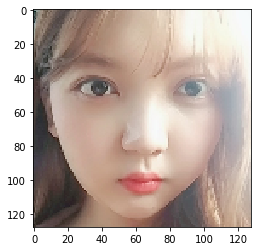

In [52]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break

index = 0

# 테스트셋의  0번째 이미지 출력
image = data_batch[index]

plt.imshow(image)
plt.show()

In [53]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 0번쨰 번째 라벨 이름 출력
labels_list[np.argmax(results[index])]

'LISA'

In [54]:
for i in range(0,10):
    print(labels_list[i])
    print(results[0][i]*100)

IRENE
0.00011775481425502221
IU
2.059345878660679
JENNY
2.2241467610001564
KIMGOEUN
0.05058198585174978
LISA
50.485384464263916
NAYEON
2.2005880251526833
ROSE
0.7852842099964619
TAEYEON
41.80997312068939
YEJI
0.0006818497240601573
YOONA
0.3838872304186225
